In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))
#fig = plt.figure(1,figsize=(7, 5)) ## To save figure.

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
    

<Figure size 504x360 with 0 Axes>

In [5]:
def F_function(k):
    eps = 1.0E-8
    k2 = 2.0E0*k
    ks = k*k
    if np.abs(k)>eps:
        pre = (1-ks)/k2
    else:
        pre = (1-eps*eps)/(2.0E0*eps)
    if 1.0-k > eps:
        temp = np.abs((1+k)/(1-k))
    else:
        temp = (1+k)/(np.abs(1-k)+eps*100.0)
    y = 1+np.log(temp)*pre
    return y

In [11]:
import copy

In [38]:
def ek(k,rs):
    rs_temp = copy.deepcopy(rs)
    et = k**2/2.0E0
    pre = 1.9192/(0.5291772*rs_temp*np.pi)
    y = et - pre*F_function(k*rs)
    return y


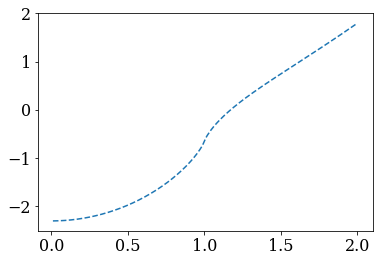

In [39]:
k = np.arange(0.01,2.0+0.01,0.01)
Nk = len(k)
yy = np.zeros(Nk)
rs = 1.0
for i in range(Nk):
    yy[i] = ek(k[i],rs)
    
plt.plot(k,yy,'--')
plt.show()

In [40]:
yy2 = np.zeros(Nk)
rs2 = 2.0
for i in range(Nk):
    yy2[i] = ek(k[i],rs2)

In [41]:
yy5 = np.zeros(Nk)
rs5 = 5.0
for i in range(Nk):
    yy5[i] = ek(k[i],rs5)

In [23]:
y0 = k**2/2.0
    

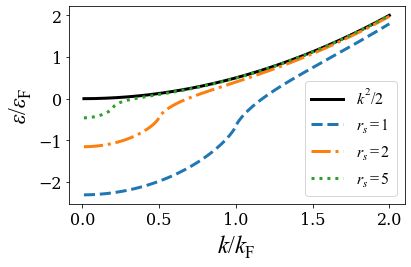

In [47]:
plt.plot(k,y0,'-',c='k',lw=3,label=r"$k^2/2$")
plt.plot(k,yy,'--',lw=3,label=r"$r_s = 1$")
plt.plot(k,yy2,'-.',lw=3,label=r"$r_s = 2$")
plt.plot(k,yy5,':',lw=3,label=r"$r_s = 5$")
plt.legend(loc='best')
plt.xlabel(r"$k/k_{\rm{F}}$",fontsize=24)
plt.ylabel(r"$\varepsilon/\varepsilon_{\rm{F}}$",fontsize=24)
figname='FreeE_HF.png'
plt.tight_layout()
plt.savefig(figname,dpi=300,format='png')
plt.show()